In [12]:
# Import appropriate libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

In [13]:
# Read in the data

data = arff.loadarff('../Springboard/CAPSTONE/Data/ThoracicSurgery.arff')
df = pd.DataFrame(data[0])

df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,b'DGN2',2.88,2.16,b'PRZ1',b'F',b'F',b'F',b'T',b'T',b'OC14',b'F',b'F',b'F',b'T',b'F',60.0,b'F'
1,b'DGN3',3.40,1.88,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC12',b'F',b'F',b'F',b'T',b'F',51.0,b'F'
2,b'DGN3',2.76,2.08,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC11',b'F',b'F',b'F',b'T',b'F',59.0,b'F'
3,b'DGN3',3.68,3.04,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC11',b'F',b'F',b'F',b'F',b'F',54.0,b'F'
4,b'DGN3',2.44,0.96,b'PRZ2',b'F',b'T',b'F',b'T',b'T',b'OC11',b'F',b'F',b'F',b'T',b'F',73.0,b'T'


In [31]:
df.shape

(470, 17)

In [14]:
# Function to decode the data (remove the byte info 'b')

def apply_decode(df_name):
    for col_name in df_name.columns:
        if df_name[col_name].dtype != 'float64':
            df_name[col_name] = df_name[col_name].apply(lambda col: col.decode('utf-8'))
    return df_name

In [15]:
# Apply decoding to data 

apply_decode(df)

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60.0,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51.0,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59.0,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54.0,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73.0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63.0,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61.0,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52.0,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79.0,F


In [30]:
# Replace the Boolean values with T=1 , F=0

df.replace('F', 0, inplace=True)
df.replace('T', 1, inplace=True)
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60.0,0
1,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51.0,0
2,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59.0,0
3,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54.0,0
4,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73.0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    float64
 16  Risk1Yr  470 non-null    object 
dtypes: float64(3), object(14)
memory usage: 62.5+ KB


In [27]:
# Check for null values

df[df.isnull()].count()

DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64

In [33]:
df[df.isna()].count()

DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64

This dataset appears to be complete with no null / NA values!

In [56]:
df.nunique(axis=0)

DGN          7
PRE4       134
PRE5       136
PRE6         3
PRE7         2
PRE8         2
PRE9         2
PRE10        2
PRE11        2
PRE14        4
PRE17        2
PRE19        2
PRE25        2
PRE30        2
PRE32        2
AGE         45
Risk1Yr      2
dtype: int64

In [32]:
df.describe()

,PRE4,PRE5,PRE7,PRE8,PRE9,PRE10,PRE11,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,3.281638,4.568702,0.065957,0.144681,0.065957,0.687234,0.165957,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,0.871395,11.767857,0.248472,0.352154,0.248472,0.464114,0.372439,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.160000,2.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.807500,3.080000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,6.300000,86.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [37]:
# Looking at the breakdown of the response variable

df["Risk1Yr"].value_counts()/df.shape[0]

0    0.851064
1    0.148936
Name: Risk1Yr, dtype: float64

This brief look at the variable we want to predict shows that, unsurprisingly, the 1 Yr Risk column contains 2 classes (Alive = 0 , Deceased = 1) and they are unbalanced at a ratio of around 85/15 Alive/Deceased. This will need to be considered later on when forming the training data.

In [40]:
df.groupby(df['Risk1Yr'])['PRE4'].describe()

,count,mean,std,min,25%,50%,75%,max
Risk1Yr,,,,,,,,
0,400.0,3.298525,0.889646,1.44,2.60,3.16,3.84,6.30
1,70.0,3.185143,0.757218,2.00,2.64,3.04,3.66,4.96


<ipython-input-47-96e3703537df>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax);


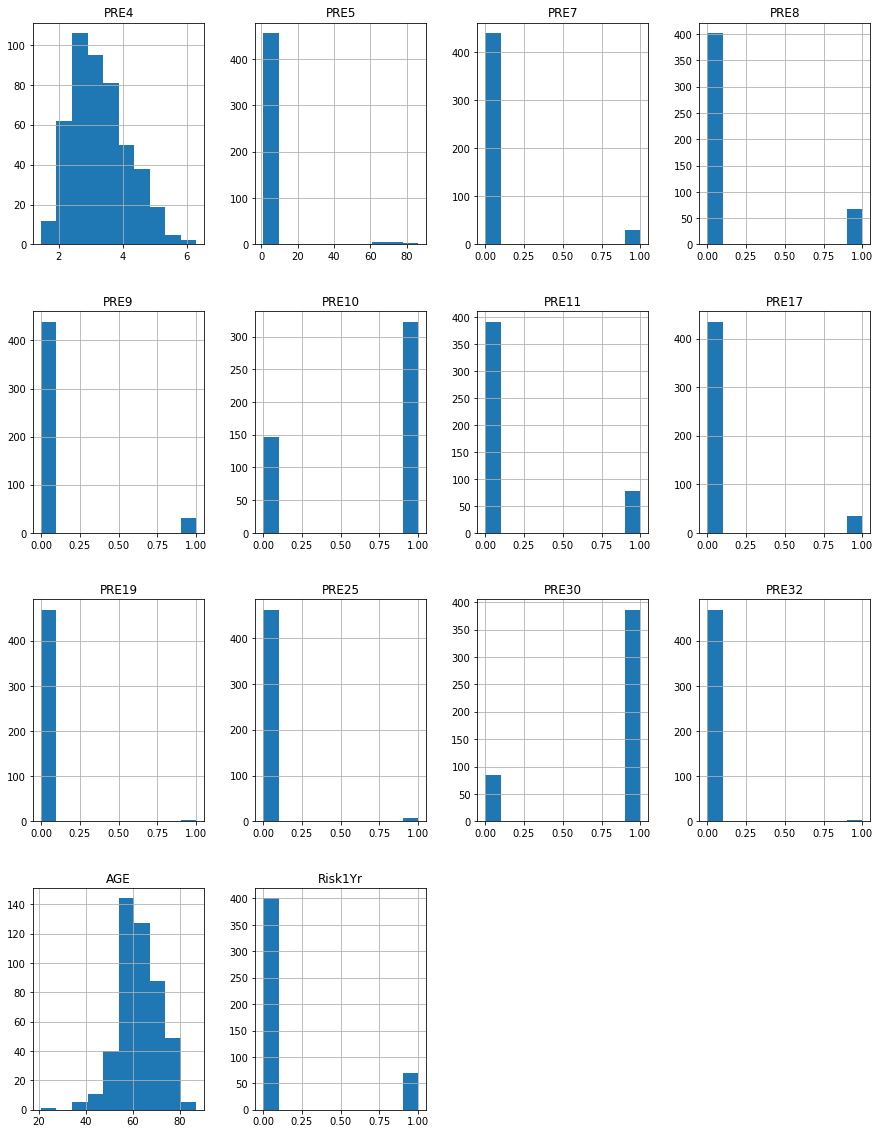

In [47]:
# Overview of distributions of all the variables

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax);